In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# device = torch.device('mps')

In [10]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
        self.classifier = nn.Linear(in_features=4 * 4 * 128, out_features=num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = CNN()
model

CNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
  )
  (classifier): Linear(in_features=2048, out_features=10, bias=True)
)

In [11]:
PATH = '../models/cifar10_cpu.pth'
model_params = torch.load(PATH)
model_params

OrderedDict([('features.0.weight',
              tensor([[[[ 3.0478e-02,  1.0375e-01, -8.3667e-02,  2.1919e-03, -1.1238e-01],
                        [-1.3599e-01, -8.2225e-02, -2.0827e-01,  3.5683e-02, -1.9806e-03],
                        [ 1.7309e-03, -1.0920e-01,  5.1975e-02,  9.4470e-02, -1.7184e-02],
                        [-1.6283e-01, -9.3491e-02, -1.3820e-01, -1.1710e-01, -1.0445e-01],
                        [-2.2006e-02, -7.1510e-02, -7.5577e-03, -2.7467e-02, -1.3683e-02]],
              
                       [[-8.5884e-02,  1.8724e-01, -1.3658e-02,  1.0821e-01,  5.0915e-02],
                        [-1.4315e-02,  7.9999e-02,  6.5105e-02,  1.9580e-01, -8.1265e-02],
                        [ 1.9186e-01,  2.6536e-01,  2.9887e-01,  2.7966e-01,  4.6055e-02],
                        [ 4.3903e-02,  1.4252e-01,  1.8310e-01,  9.7165e-02, -4.7882e-02],
                        [ 9.9453e-02,  9.8273e-02, -4.7507e-02, -4.2252e-02,  5.0884e-02]],
              
                       

In [12]:
model.load_state_dict(model_params)

<All keys matched successfully>

In [13]:
# PATH = '../models/cifar10_cpu.pth'
# model_cpu = model.to('cpu')
# torch.save(model_cpu.state_dict(), PATH)

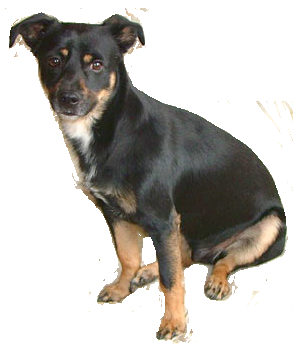

In [14]:
IMG_PATH = '../data/dog08.png'
img = Image.open(IMG_PATH).convert('RGB')
img

In [15]:
test_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

img_transformed = test_transform(img).unsqueeze(0)
img_transformed

tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9294,  0.5922,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9216,  0.1059, -0.4353,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9216,  0.5922,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9137,  0.0824, -0.4667,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 0.9922,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.8980,  

In [50]:
output = model(img_transformed)
pred = nn.Softmax(dim=1)(output)
label = int(pred.argmax(1))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('class:', classes[label])
print('score:', float(pred[0][label]))

class: frog
score: 0.5856677293777466
